In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using Devices', device)

Using Devices cuda


In [3]:
#hyperparameters 
latent_dim = 100
hidden_dim = 256
image_size = 28*28
batch_size = 128
epochs = 500
lr = 3e-4

In [4]:
# Dataloader
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.5],[0.5])])
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(mnist, batch_size=batch_size, shuffle=True)

In [5]:
#Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim,hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim,hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim,image_size),
            nn.Tanh()
        )

    def forward(self,z):
        return self.model(z)

In [6]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
    def forward(self, img):
        return self.model(img)

In [7]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [8]:
# Loss and Optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

Epoch [1/500]  D_loss: 0.3041  G_loss: 2.9788
Epoch [2/500]  D_loss: 0.1074  G_loss: 4.8053
Epoch [3/500]  D_loss: 0.5464  G_loss: 2.1844
Epoch [4/500]  D_loss: 0.4346  G_loss: 4.5990
Epoch [5/500]  D_loss: 0.8548  G_loss: 1.8615
Epoch [6/500]  D_loss: 0.9743  G_loss: 1.2622
Epoch [7/500]  D_loss: 0.5750  G_loss: 1.9987
Epoch [8/500]  D_loss: 1.0197  G_loss: 1.5900
Epoch [9/500]  D_loss: 1.9009  G_loss: 3.3700
Epoch [10/500]  D_loss: 0.9247  G_loss: 2.1762


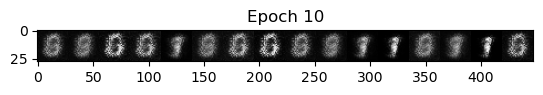

Epoch [11/500]  D_loss: 1.3969  G_loss: 1.6982
Epoch [12/500]  D_loss: 1.5238  G_loss: 1.4684
Epoch [13/500]  D_loss: 1.0668  G_loss: 2.9343
Epoch [14/500]  D_loss: 0.3895  G_loss: 2.4446
Epoch [15/500]  D_loss: 0.8447  G_loss: 1.8825
Epoch [16/500]  D_loss: 0.6223  G_loss: 2.9535
Epoch [17/500]  D_loss: 0.5131  G_loss: 2.4586
Epoch [18/500]  D_loss: 0.7597  G_loss: 3.0176
Epoch [19/500]  D_loss: 1.6289  G_loss: 1.0519
Epoch [20/500]  D_loss: 0.7658  G_loss: 2.9242


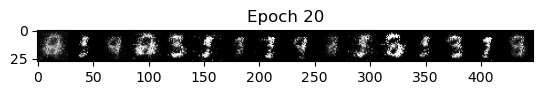

Epoch [21/500]  D_loss: 0.6718  G_loss: 2.3550
Epoch [22/500]  D_loss: 0.4884  G_loss: 2.6888
Epoch [23/500]  D_loss: 0.9221  G_loss: 2.0521
Epoch [24/500]  D_loss: 0.8859  G_loss: 1.7815
Epoch [25/500]  D_loss: 0.7310  G_loss: 3.4053
Epoch [26/500]  D_loss: 1.3085  G_loss: 1.5048
Epoch [27/500]  D_loss: 0.7129  G_loss: 2.4233
Epoch [28/500]  D_loss: 0.6796  G_loss: 2.4080
Epoch [29/500]  D_loss: 0.7490  G_loss: 2.4096
Epoch [30/500]  D_loss: 0.7066  G_loss: 2.0450


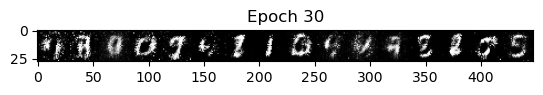

Epoch [31/500]  D_loss: 1.3276  G_loss: 1.6956
Epoch [32/500]  D_loss: 0.5350  G_loss: 2.0702
Epoch [33/500]  D_loss: 0.5693  G_loss: 2.1182
Epoch [34/500]  D_loss: 0.8748  G_loss: 1.4569
Epoch [35/500]  D_loss: 0.8458  G_loss: 1.8213
Epoch [36/500]  D_loss: 0.9756  G_loss: 1.9677
Epoch [37/500]  D_loss: 0.8774  G_loss: 1.5523
Epoch [38/500]  D_loss: 1.1155  G_loss: 1.8453
Epoch [39/500]  D_loss: 0.9891  G_loss: 1.9527
Epoch [40/500]  D_loss: 1.0094  G_loss: 1.7822


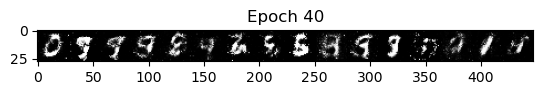

Epoch [41/500]  D_loss: 0.8011  G_loss: 1.7422
Epoch [42/500]  D_loss: 0.9567  G_loss: 1.4679
Epoch [43/500]  D_loss: 0.9552  G_loss: 2.0760
Epoch [44/500]  D_loss: 0.9842  G_loss: 1.2802
Epoch [45/500]  D_loss: 0.8465  G_loss: 1.6427
Epoch [46/500]  D_loss: 0.8640  G_loss: 2.0743
Epoch [47/500]  D_loss: 0.8422  G_loss: 1.7300
Epoch [48/500]  D_loss: 0.9948  G_loss: 1.8994
Epoch [49/500]  D_loss: 0.9073  G_loss: 1.5244
Epoch [50/500]  D_loss: 0.9583  G_loss: 1.6914


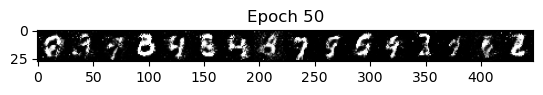

Epoch [51/500]  D_loss: 0.9824  G_loss: 1.4811
Epoch [52/500]  D_loss: 0.9252  G_loss: 1.6034
Epoch [53/500]  D_loss: 0.8546  G_loss: 1.6285
Epoch [54/500]  D_loss: 0.8723  G_loss: 2.0882
Epoch [55/500]  D_loss: 0.9798  G_loss: 1.4673
Epoch [56/500]  D_loss: 0.6580  G_loss: 2.0762
Epoch [57/500]  D_loss: 0.9020  G_loss: 1.7897
Epoch [58/500]  D_loss: 0.9384  G_loss: 1.2933
Epoch [59/500]  D_loss: 0.8864  G_loss: 1.8406
Epoch [60/500]  D_loss: 0.8277  G_loss: 1.5256


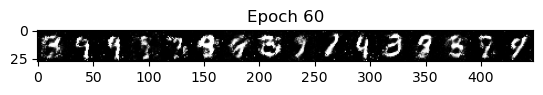

Epoch [61/500]  D_loss: 0.7355  G_loss: 2.0376
Epoch [62/500]  D_loss: 0.8076  G_loss: 1.9482
Epoch [63/500]  D_loss: 0.8827  G_loss: 1.6553
Epoch [64/500]  D_loss: 0.8361  G_loss: 1.9303
Epoch [65/500]  D_loss: 0.8990  G_loss: 2.0284
Epoch [66/500]  D_loss: 0.6477  G_loss: 1.5051
Epoch [67/500]  D_loss: 0.8767  G_loss: 2.0134
Epoch [68/500]  D_loss: 0.7547  G_loss: 2.0118
Epoch [69/500]  D_loss: 0.8779  G_loss: 1.5529
Epoch [70/500]  D_loss: 1.0404  G_loss: 1.5137


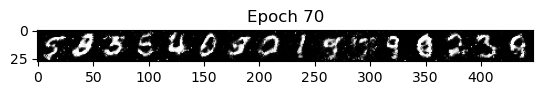

Epoch [71/500]  D_loss: 0.8454  G_loss: 1.9119
Epoch [72/500]  D_loss: 0.8727  G_loss: 2.0733
Epoch [73/500]  D_loss: 0.7608  G_loss: 1.6462
Epoch [74/500]  D_loss: 0.8964  G_loss: 1.6218
Epoch [75/500]  D_loss: 1.0734  G_loss: 1.7748
Epoch [76/500]  D_loss: 0.7182  G_loss: 1.9464
Epoch [77/500]  D_loss: 0.7342  G_loss: 2.0773
Epoch [78/500]  D_loss: 0.8187  G_loss: 1.5688
Epoch [79/500]  D_loss: 0.8150  G_loss: 1.3554
Epoch [80/500]  D_loss: 0.9583  G_loss: 1.3826


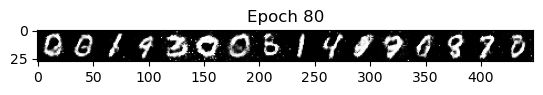

Epoch [81/500]  D_loss: 0.7054  G_loss: 1.8571
Epoch [82/500]  D_loss: 0.8785  G_loss: 1.7589
Epoch [83/500]  D_loss: 0.9552  G_loss: 1.4271
Epoch [84/500]  D_loss: 0.8449  G_loss: 1.4556
Epoch [85/500]  D_loss: 0.9031  G_loss: 2.2268
Epoch [86/500]  D_loss: 0.8447  G_loss: 1.8443
Epoch [87/500]  D_loss: 0.7279  G_loss: 2.0852
Epoch [88/500]  D_loss: 0.6937  G_loss: 1.5907
Epoch [89/500]  D_loss: 0.8033  G_loss: 1.7566
Epoch [90/500]  D_loss: 0.7261  G_loss: 1.4064


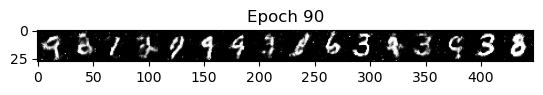

Epoch [91/500]  D_loss: 0.7899  G_loss: 1.9590
Epoch [92/500]  D_loss: 1.0189  G_loss: 1.4767
Epoch [93/500]  D_loss: 0.8191  G_loss: 1.8481
Epoch [94/500]  D_loss: 0.8856  G_loss: 1.5599
Epoch [95/500]  D_loss: 0.9499  G_loss: 1.1883
Epoch [96/500]  D_loss: 0.7419  G_loss: 1.8172
Epoch [97/500]  D_loss: 0.9091  G_loss: 1.5127
Epoch [98/500]  D_loss: 0.8782  G_loss: 1.4671
Epoch [99/500]  D_loss: 0.7992  G_loss: 1.8125
Epoch [100/500]  D_loss: 1.0077  G_loss: 1.8899


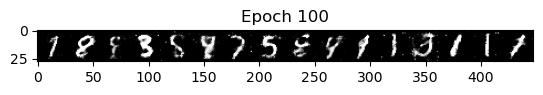

Epoch [101/500]  D_loss: 0.6971  G_loss: 1.9219
Epoch [102/500]  D_loss: 0.8992  G_loss: 1.5522
Epoch [103/500]  D_loss: 0.7264  G_loss: 1.6524
Epoch [104/500]  D_loss: 0.8340  G_loss: 1.8252
Epoch [105/500]  D_loss: 0.9657  G_loss: 2.1337
Epoch [106/500]  D_loss: 0.8248  G_loss: 1.6226
Epoch [107/500]  D_loss: 0.9372  G_loss: 1.6939
Epoch [108/500]  D_loss: 0.8271  G_loss: 1.6016
Epoch [109/500]  D_loss: 0.7964  G_loss: 1.7783
Epoch [110/500]  D_loss: 0.7522  G_loss: 1.8611


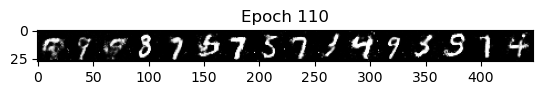

Epoch [111/500]  D_loss: 0.8055  G_loss: 1.5032
Epoch [112/500]  D_loss: 0.9768  G_loss: 1.8299
Epoch [113/500]  D_loss: 0.9301  G_loss: 1.8982
Epoch [114/500]  D_loss: 0.7380  G_loss: 1.6412
Epoch [115/500]  D_loss: 1.0608  G_loss: 1.5153
Epoch [116/500]  D_loss: 0.9386  G_loss: 1.9138
Epoch [117/500]  D_loss: 0.8228  G_loss: 1.6966
Epoch [118/500]  D_loss: 0.8619  G_loss: 1.5052
Epoch [119/500]  D_loss: 0.8130  G_loss: 1.4620
Epoch [120/500]  D_loss: 0.9488  G_loss: 2.0527


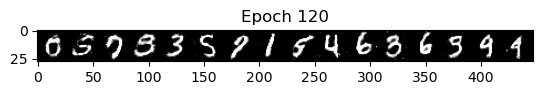

Epoch [121/500]  D_loss: 1.0644  G_loss: 1.8757
Epoch [122/500]  D_loss: 0.8246  G_loss: 1.9199
Epoch [123/500]  D_loss: 0.8520  G_loss: 1.5558
Epoch [124/500]  D_loss: 0.9587  G_loss: 1.6308
Epoch [125/500]  D_loss: 0.8590  G_loss: 1.8715
Epoch [126/500]  D_loss: 0.8683  G_loss: 1.9886
Epoch [127/500]  D_loss: 0.9848  G_loss: 1.8367
Epoch [128/500]  D_loss: 0.8713  G_loss: 1.8819
Epoch [129/500]  D_loss: 0.8936  G_loss: 1.4347
Epoch [130/500]  D_loss: 0.8950  G_loss: 1.6155


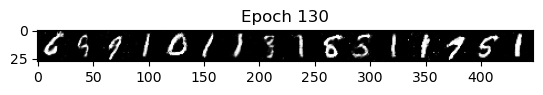

Epoch [131/500]  D_loss: 0.8783  G_loss: 1.5922
Epoch [132/500]  D_loss: 0.9023  G_loss: 1.4415
Epoch [133/500]  D_loss: 0.8629  G_loss: 1.3447
Epoch [134/500]  D_loss: 0.6432  G_loss: 1.7572
Epoch [135/500]  D_loss: 0.7522  G_loss: 1.5148
Epoch [136/500]  D_loss: 1.0637  G_loss: 1.6143
Epoch [137/500]  D_loss: 0.8356  G_loss: 2.0393
Epoch [138/500]  D_loss: 1.0107  G_loss: 1.6357
Epoch [139/500]  D_loss: 0.9839  G_loss: 1.4917
Epoch [140/500]  D_loss: 0.8416  G_loss: 1.3484


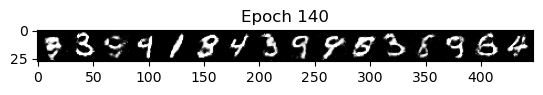

Epoch [141/500]  D_loss: 0.8006  G_loss: 1.8002
Epoch [142/500]  D_loss: 1.0459  G_loss: 1.5240
Epoch [143/500]  D_loss: 0.8201  G_loss: 1.9863
Epoch [144/500]  D_loss: 0.8100  G_loss: 1.6030
Epoch [145/500]  D_loss: 0.8055  G_loss: 1.4532
Epoch [146/500]  D_loss: 0.8660  G_loss: 1.3572
Epoch [147/500]  D_loss: 0.8520  G_loss: 1.5163
Epoch [148/500]  D_loss: 0.8467  G_loss: 1.4390
Epoch [149/500]  D_loss: 1.0380  G_loss: 1.9476
Epoch [150/500]  D_loss: 0.8357  G_loss: 1.9671


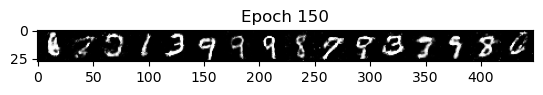

Epoch [151/500]  D_loss: 0.9751  G_loss: 1.4912
Epoch [152/500]  D_loss: 1.0185  G_loss: 1.3210
Epoch [153/500]  D_loss: 0.8728  G_loss: 1.6546
Epoch [154/500]  D_loss: 0.8937  G_loss: 1.8656
Epoch [155/500]  D_loss: 0.8115  G_loss: 1.4575
Epoch [156/500]  D_loss: 0.8617  G_loss: 1.6275
Epoch [157/500]  D_loss: 0.9584  G_loss: 1.7753
Epoch [158/500]  D_loss: 0.9497  G_loss: 1.7045
Epoch [159/500]  D_loss: 0.8880  G_loss: 1.9931
Epoch [160/500]  D_loss: 0.8060  G_loss: 1.7862


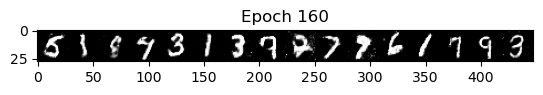

Epoch [161/500]  D_loss: 0.8397  G_loss: 2.0911
Epoch [162/500]  D_loss: 0.8030  G_loss: 1.2462
Epoch [163/500]  D_loss: 0.9732  G_loss: 1.6360
Epoch [164/500]  D_loss: 0.7656  G_loss: 1.5339
Epoch [165/500]  D_loss: 0.9359  G_loss: 1.5458
Epoch [166/500]  D_loss: 0.7807  G_loss: 1.4296
Epoch [167/500]  D_loss: 0.7927  G_loss: 1.6790
Epoch [168/500]  D_loss: 1.0438  G_loss: 1.8124
Epoch [169/500]  D_loss: 0.9647  G_loss: 1.9240
Epoch [170/500]  D_loss: 1.0656  G_loss: 1.2779


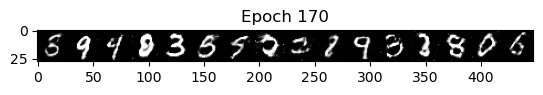

Epoch [171/500]  D_loss: 0.7382  G_loss: 1.5343
Epoch [172/500]  D_loss: 0.9080  G_loss: 1.7086
Epoch [173/500]  D_loss: 0.8355  G_loss: 1.8237
Epoch [174/500]  D_loss: 0.9038  G_loss: 2.0196
Epoch [175/500]  D_loss: 0.7663  G_loss: 1.7425
Epoch [176/500]  D_loss: 0.8893  G_loss: 1.7041
Epoch [177/500]  D_loss: 0.9064  G_loss: 1.4684
Epoch [178/500]  D_loss: 0.8490  G_loss: 1.6019
Epoch [179/500]  D_loss: 0.9364  G_loss: 1.6553
Epoch [180/500]  D_loss: 0.8054  G_loss: 2.0633


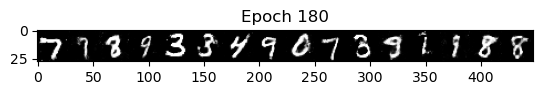

Epoch [181/500]  D_loss: 0.8954  G_loss: 1.4401
Epoch [182/500]  D_loss: 0.9133  G_loss: 1.8920
Epoch [183/500]  D_loss: 0.7672  G_loss: 1.5437
Epoch [184/500]  D_loss: 0.8554  G_loss: 1.8771
Epoch [185/500]  D_loss: 0.7726  G_loss: 1.9864
Epoch [186/500]  D_loss: 0.8214  G_loss: 1.6777
Epoch [187/500]  D_loss: 0.9186  G_loss: 2.2100
Epoch [188/500]  D_loss: 0.8401  G_loss: 1.9084
Epoch [189/500]  D_loss: 0.8145  G_loss: 1.8849
Epoch [190/500]  D_loss: 0.9331  G_loss: 1.3787


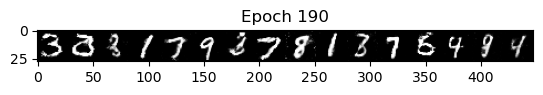

Epoch [191/500]  D_loss: 0.9875  G_loss: 1.3419
Epoch [192/500]  D_loss: 0.8955  G_loss: 1.5038
Epoch [193/500]  D_loss: 0.8265  G_loss: 1.6576
Epoch [194/500]  D_loss: 1.0158  G_loss: 1.9236
Epoch [195/500]  D_loss: 0.9429  G_loss: 2.0043
Epoch [196/500]  D_loss: 0.9415  G_loss: 1.4197
Epoch [197/500]  D_loss: 0.7030  G_loss: 1.5950
Epoch [198/500]  D_loss: 0.8650  G_loss: 2.1373
Epoch [199/500]  D_loss: 0.9261  G_loss: 1.5493
Epoch [200/500]  D_loss: 0.9193  G_loss: 1.4324


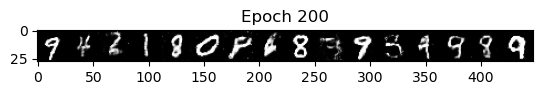

Epoch [201/500]  D_loss: 0.8513  G_loss: 1.5355
Epoch [202/500]  D_loss: 0.7743  G_loss: 1.5428
Epoch [203/500]  D_loss: 0.8658  G_loss: 1.8876
Epoch [204/500]  D_loss: 0.7087  G_loss: 2.0043
Epoch [205/500]  D_loss: 0.8395  G_loss: 1.9796
Epoch [206/500]  D_loss: 0.9207  G_loss: 2.0308
Epoch [207/500]  D_loss: 0.9768  G_loss: 1.9847
Epoch [208/500]  D_loss: 0.7672  G_loss: 1.4030
Epoch [209/500]  D_loss: 0.8700  G_loss: 1.7632
Epoch [210/500]  D_loss: 0.8404  G_loss: 1.4253


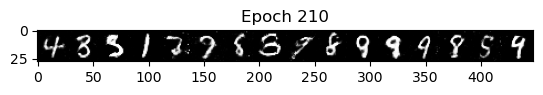

Epoch [211/500]  D_loss: 0.7624  G_loss: 1.8357
Epoch [212/500]  D_loss: 0.8287  G_loss: 1.8082
Epoch [213/500]  D_loss: 0.7572  G_loss: 1.4828
Epoch [214/500]  D_loss: 0.8250  G_loss: 2.2475
Epoch [215/500]  D_loss: 0.6578  G_loss: 2.2004
Epoch [216/500]  D_loss: 0.8112  G_loss: 2.0098
Epoch [217/500]  D_loss: 0.8438  G_loss: 1.9271
Epoch [218/500]  D_loss: 0.7866  G_loss: 1.7581
Epoch [219/500]  D_loss: 0.8210  G_loss: 1.6621
Epoch [220/500]  D_loss: 0.8194  G_loss: 2.1171


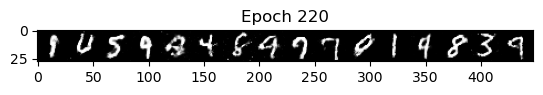

Epoch [221/500]  D_loss: 0.8217  G_loss: 2.0131
Epoch [222/500]  D_loss: 1.0236  G_loss: 2.0683
Epoch [223/500]  D_loss: 0.7411  G_loss: 1.5787
Epoch [224/500]  D_loss: 0.7385  G_loss: 1.8464
Epoch [225/500]  D_loss: 0.8458  G_loss: 1.9517
Epoch [226/500]  D_loss: 0.9278  G_loss: 1.9872
Epoch [227/500]  D_loss: 0.9043  G_loss: 2.2195
Epoch [228/500]  D_loss: 1.0208  G_loss: 1.3223
Epoch [229/500]  D_loss: 0.7856  G_loss: 1.9663
Epoch [230/500]  D_loss: 0.8507  G_loss: 1.9738


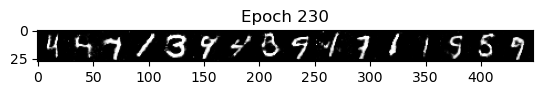

Epoch [231/500]  D_loss: 0.8816  G_loss: 1.6578
Epoch [232/500]  D_loss: 0.7947  G_loss: 1.9866
Epoch [233/500]  D_loss: 0.8630  G_loss: 2.1568
Epoch [234/500]  D_loss: 0.8700  G_loss: 1.7578
Epoch [235/500]  D_loss: 0.7141  G_loss: 2.3326
Epoch [236/500]  D_loss: 0.8243  G_loss: 2.1829
Epoch [237/500]  D_loss: 0.8002  G_loss: 1.8854
Epoch [238/500]  D_loss: 0.5934  G_loss: 1.7727
Epoch [239/500]  D_loss: 0.7233  G_loss: 2.1934
Epoch [240/500]  D_loss: 0.8632  G_loss: 1.7488


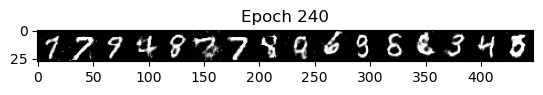

Epoch [241/500]  D_loss: 0.8418  G_loss: 2.4843
Epoch [242/500]  D_loss: 0.8398  G_loss: 1.7215
Epoch [243/500]  D_loss: 0.8829  G_loss: 1.7759
Epoch [244/500]  D_loss: 0.8247  G_loss: 1.3112
Epoch [245/500]  D_loss: 0.7092  G_loss: 1.9403
Epoch [246/500]  D_loss: 0.8177  G_loss: 1.9768
Epoch [247/500]  D_loss: 0.7863  G_loss: 1.7742
Epoch [248/500]  D_loss: 0.7567  G_loss: 1.8454
Epoch [249/500]  D_loss: 0.9116  G_loss: 1.8859
Epoch [250/500]  D_loss: 0.8670  G_loss: 1.9058


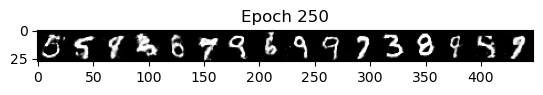

Epoch [251/500]  D_loss: 0.6939  G_loss: 1.7918
Epoch [252/500]  D_loss: 0.8829  G_loss: 1.8207
Epoch [253/500]  D_loss: 0.6992  G_loss: 1.8671
Epoch [254/500]  D_loss: 0.8299  G_loss: 1.8991
Epoch [255/500]  D_loss: 0.8291  G_loss: 1.8527
Epoch [256/500]  D_loss: 0.6982  G_loss: 1.7360
Epoch [257/500]  D_loss: 0.9685  G_loss: 1.8302
Epoch [258/500]  D_loss: 0.6819  G_loss: 1.8507
Epoch [259/500]  D_loss: 0.8363  G_loss: 2.1382
Epoch [260/500]  D_loss: 0.7336  G_loss: 1.9242


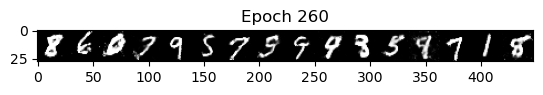

Epoch [261/500]  D_loss: 0.8225  G_loss: 2.3967
Epoch [262/500]  D_loss: 0.8221  G_loss: 1.6382
Epoch [263/500]  D_loss: 0.7589  G_loss: 1.9043
Epoch [264/500]  D_loss: 0.9631  G_loss: 1.8031
Epoch [265/500]  D_loss: 0.8190  G_loss: 1.8363
Epoch [266/500]  D_loss: 0.8116  G_loss: 1.9963
Epoch [267/500]  D_loss: 0.7896  G_loss: 2.0941
Epoch [268/500]  D_loss: 0.8387  G_loss: 2.5538
Epoch [269/500]  D_loss: 0.7448  G_loss: 1.9485
Epoch [270/500]  D_loss: 0.7774  G_loss: 1.7259


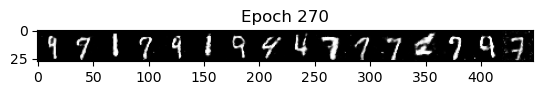

Epoch [271/500]  D_loss: 0.6775  G_loss: 2.0883
Epoch [272/500]  D_loss: 0.9418  G_loss: 1.7754
Epoch [273/500]  D_loss: 0.7678  G_loss: 2.2958
Epoch [274/500]  D_loss: 0.8100  G_loss: 2.2606
Epoch [275/500]  D_loss: 0.6067  G_loss: 2.0921
Epoch [276/500]  D_loss: 0.6152  G_loss: 2.3388
Epoch [277/500]  D_loss: 0.7453  G_loss: 1.8001
Epoch [278/500]  D_loss: 0.7628  G_loss: 1.6526
Epoch [279/500]  D_loss: 0.8256  G_loss: 2.1046
Epoch [280/500]  D_loss: 0.7615  G_loss: 1.7735


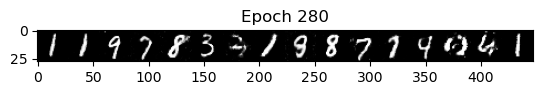

Epoch [281/500]  D_loss: 0.9536  G_loss: 2.1361
Epoch [282/500]  D_loss: 0.7848  G_loss: 1.6923
Epoch [283/500]  D_loss: 0.6290  G_loss: 1.7906
Epoch [284/500]  D_loss: 0.9280  G_loss: 1.5159
Epoch [285/500]  D_loss: 0.8386  G_loss: 2.3171
Epoch [286/500]  D_loss: 0.6710  G_loss: 1.7779
Epoch [287/500]  D_loss: 0.7907  G_loss: 2.0218
Epoch [288/500]  D_loss: 0.7180  G_loss: 2.0436
Epoch [289/500]  D_loss: 0.7699  G_loss: 2.1181
Epoch [290/500]  D_loss: 0.7960  G_loss: 2.1585


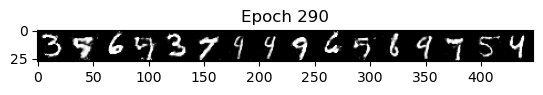

Epoch [291/500]  D_loss: 0.8161  G_loss: 1.7576
Epoch [292/500]  D_loss: 0.7990  G_loss: 1.6086
Epoch [293/500]  D_loss: 0.7322  G_loss: 1.7789
Epoch [294/500]  D_loss: 0.7326  G_loss: 1.8852
Epoch [295/500]  D_loss: 0.5800  G_loss: 1.8616
Epoch [296/500]  D_loss: 0.7244  G_loss: 1.8225
Epoch [297/500]  D_loss: 0.7993  G_loss: 2.5277
Epoch [298/500]  D_loss: 0.8648  G_loss: 1.8456
Epoch [299/500]  D_loss: 0.8365  G_loss: 1.8872
Epoch [300/500]  D_loss: 0.7455  G_loss: 1.9296


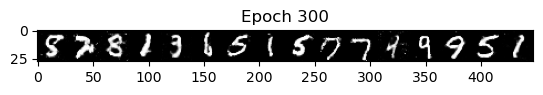

Epoch [301/500]  D_loss: 0.6952  G_loss: 2.0401
Epoch [302/500]  D_loss: 0.7885  G_loss: 2.5209
Epoch [303/500]  D_loss: 0.8579  G_loss: 2.3242
Epoch [304/500]  D_loss: 0.8028  G_loss: 1.7138
Epoch [305/500]  D_loss: 0.8133  G_loss: 2.3339
Epoch [306/500]  D_loss: 0.7626  G_loss: 2.0438
Epoch [307/500]  D_loss: 0.7792  G_loss: 2.4209
Epoch [308/500]  D_loss: 0.6953  G_loss: 2.1487
Epoch [309/500]  D_loss: 0.7289  G_loss: 2.0244
Epoch [310/500]  D_loss: 0.7070  G_loss: 2.1762


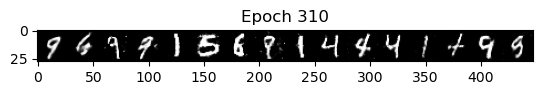

Epoch [311/500]  D_loss: 0.7344  G_loss: 2.0697
Epoch [312/500]  D_loss: 0.9679  G_loss: 1.8206
Epoch [313/500]  D_loss: 0.8018  G_loss: 1.8434
Epoch [314/500]  D_loss: 0.7539  G_loss: 2.4432
Epoch [315/500]  D_loss: 0.6833  G_loss: 2.0772
Epoch [316/500]  D_loss: 0.9092  G_loss: 2.1379
Epoch [317/500]  D_loss: 0.7783  G_loss: 1.8750
Epoch [318/500]  D_loss: 0.7618  G_loss: 2.1282
Epoch [319/500]  D_loss: 1.0267  G_loss: 2.2056
Epoch [320/500]  D_loss: 0.7543  G_loss: 2.1461


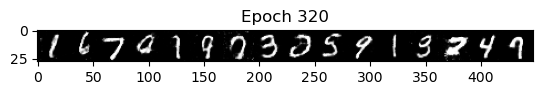

Epoch [321/500]  D_loss: 0.7108  G_loss: 2.2004
Epoch [322/500]  D_loss: 0.7308  G_loss: 1.9667
Epoch [323/500]  D_loss: 0.6915  G_loss: 1.7749
Epoch [324/500]  D_loss: 0.9626  G_loss: 2.3765
Epoch [325/500]  D_loss: 0.8747  G_loss: 1.6808
Epoch [326/500]  D_loss: 0.8514  G_loss: 1.9831
Epoch [327/500]  D_loss: 0.7209  G_loss: 2.2841
Epoch [328/500]  D_loss: 0.7980  G_loss: 1.9804
Epoch [329/500]  D_loss: 0.6637  G_loss: 1.9353
Epoch [330/500]  D_loss: 0.6957  G_loss: 2.0586


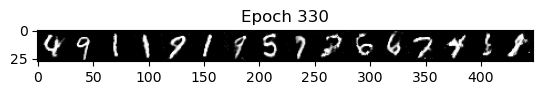

Epoch [331/500]  D_loss: 0.7866  G_loss: 1.8843
Epoch [332/500]  D_loss: 0.7959  G_loss: 2.0813
Epoch [333/500]  D_loss: 0.7923  G_loss: 2.5038
Epoch [334/500]  D_loss: 0.7786  G_loss: 2.1230
Epoch [335/500]  D_loss: 0.8257  G_loss: 1.6532
Epoch [336/500]  D_loss: 0.7217  G_loss: 2.2600
Epoch [337/500]  D_loss: 0.7327  G_loss: 1.9853
Epoch [338/500]  D_loss: 0.8003  G_loss: 2.2116
Epoch [339/500]  D_loss: 0.7186  G_loss: 1.7607
Epoch [340/500]  D_loss: 0.7457  G_loss: 1.7224


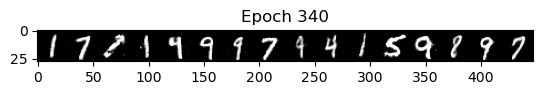

Epoch [341/500]  D_loss: 0.7813  G_loss: 1.8056
Epoch [342/500]  D_loss: 0.7361  G_loss: 1.7529
Epoch [343/500]  D_loss: 0.7496  G_loss: 1.9868
Epoch [344/500]  D_loss: 0.8422  G_loss: 1.6380
Epoch [345/500]  D_loss: 0.8209  G_loss: 1.9494
Epoch [346/500]  D_loss: 0.8726  G_loss: 2.4256
Epoch [347/500]  D_loss: 0.8374  G_loss: 1.9099
Epoch [348/500]  D_loss: 0.6639  G_loss: 1.7899
Epoch [349/500]  D_loss: 0.6955  G_loss: 1.7829
Epoch [350/500]  D_loss: 0.8409  G_loss: 2.1057


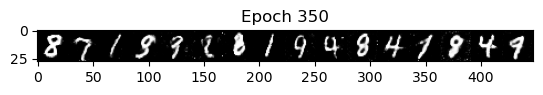

Epoch [351/500]  D_loss: 0.7363  G_loss: 2.4561
Epoch [352/500]  D_loss: 0.7061  G_loss: 2.2518
Epoch [353/500]  D_loss: 0.6269  G_loss: 2.4359
Epoch [354/500]  D_loss: 0.6626  G_loss: 2.2725
Epoch [355/500]  D_loss: 0.6307  G_loss: 2.1677
Epoch [356/500]  D_loss: 0.7407  G_loss: 2.0861
Epoch [357/500]  D_loss: 0.6692  G_loss: 2.3188
Epoch [358/500]  D_loss: 0.8187  G_loss: 2.5915
Epoch [359/500]  D_loss: 0.6790  G_loss: 1.7562
Epoch [360/500]  D_loss: 0.7093  G_loss: 2.5599


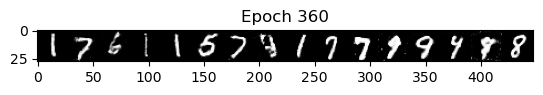

Epoch [361/500]  D_loss: 0.7353  G_loss: 2.4438
Epoch [362/500]  D_loss: 0.8755  G_loss: 2.5356
Epoch [363/500]  D_loss: 0.7955  G_loss: 2.4580
Epoch [364/500]  D_loss: 0.7804  G_loss: 2.5172
Epoch [365/500]  D_loss: 0.7728  G_loss: 2.6370
Epoch [366/500]  D_loss: 0.9668  G_loss: 2.0829
Epoch [367/500]  D_loss: 0.8342  G_loss: 2.5757
Epoch [368/500]  D_loss: 0.6191  G_loss: 1.9923
Epoch [369/500]  D_loss: 0.9031  G_loss: 1.9752
Epoch [370/500]  D_loss: 0.6929  G_loss: 1.4945


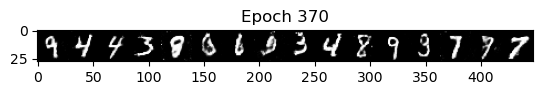

Epoch [371/500]  D_loss: 0.7119  G_loss: 2.3196
Epoch [372/500]  D_loss: 0.7962  G_loss: 2.1347
Epoch [373/500]  D_loss: 0.8442  G_loss: 1.5318
Epoch [374/500]  D_loss: 0.6927  G_loss: 2.0347
Epoch [375/500]  D_loss: 0.6880  G_loss: 1.7538
Epoch [376/500]  D_loss: 0.5389  G_loss: 2.1837
Epoch [377/500]  D_loss: 0.6460  G_loss: 2.2333
Epoch [378/500]  D_loss: 0.6401  G_loss: 2.2361
Epoch [379/500]  D_loss: 0.7608  G_loss: 2.1924
Epoch [380/500]  D_loss: 0.8062  G_loss: 2.1660


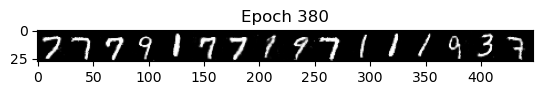

Epoch [381/500]  D_loss: 0.7509  G_loss: 2.1776
Epoch [382/500]  D_loss: 0.7803  G_loss: 2.1973
Epoch [383/500]  D_loss: 0.6265  G_loss: 2.1268
Epoch [384/500]  D_loss: 0.6482  G_loss: 2.0551
Epoch [385/500]  D_loss: 0.7052  G_loss: 1.5038
Epoch [386/500]  D_loss: 0.7405  G_loss: 2.4292
Epoch [387/500]  D_loss: 0.6244  G_loss: 2.5682
Epoch [388/500]  D_loss: 0.6374  G_loss: 2.4981
Epoch [389/500]  D_loss: 0.6206  G_loss: 2.5588
Epoch [390/500]  D_loss: 0.7027  G_loss: 2.9098


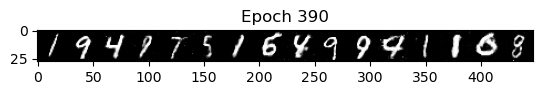

Epoch [391/500]  D_loss: 0.7189  G_loss: 1.9826
Epoch [392/500]  D_loss: 0.6395  G_loss: 2.1805
Epoch [393/500]  D_loss: 0.6609  G_loss: 2.2525
Epoch [394/500]  D_loss: 0.6650  G_loss: 2.5877
Epoch [395/500]  D_loss: 0.7456  G_loss: 2.5796
Epoch [396/500]  D_loss: 0.6160  G_loss: 2.3472
Epoch [397/500]  D_loss: 0.9144  G_loss: 2.3611
Epoch [398/500]  D_loss: 0.6845  G_loss: 1.9922
Epoch [399/500]  D_loss: 0.7525  G_loss: 2.3172
Epoch [400/500]  D_loss: 0.6525  G_loss: 2.0874


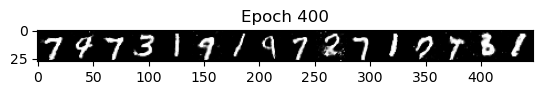

Epoch [401/500]  D_loss: 0.8532  G_loss: 2.5643
Epoch [402/500]  D_loss: 0.9206  G_loss: 2.4160
Epoch [403/500]  D_loss: 0.7148  G_loss: 2.4520
Epoch [404/500]  D_loss: 0.8272  G_loss: 2.2371
Epoch [405/500]  D_loss: 0.6475  G_loss: 1.9519
Epoch [406/500]  D_loss: 0.4906  G_loss: 1.9243
Epoch [407/500]  D_loss: 0.7500  G_loss: 2.3333
Epoch [408/500]  D_loss: 0.6390  G_loss: 1.8624
Epoch [409/500]  D_loss: 0.6842  G_loss: 2.4677
Epoch [410/500]  D_loss: 0.7064  G_loss: 1.8980


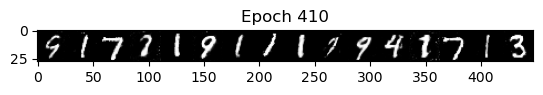

Epoch [411/500]  D_loss: 0.7610  G_loss: 2.6165
Epoch [412/500]  D_loss: 0.6353  G_loss: 2.7163
Epoch [413/500]  D_loss: 0.7355  G_loss: 2.1069
Epoch [414/500]  D_loss: 0.6415  G_loss: 2.5408
Epoch [415/500]  D_loss: 0.6766  G_loss: 2.1082
Epoch [416/500]  D_loss: 0.7275  G_loss: 2.1026
Epoch [417/500]  D_loss: 0.6247  G_loss: 2.5778
Epoch [418/500]  D_loss: 0.6854  G_loss: 2.3114
Epoch [419/500]  D_loss: 0.7064  G_loss: 2.1919
Epoch [420/500]  D_loss: 0.6364  G_loss: 2.3237


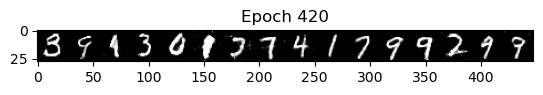

Epoch [421/500]  D_loss: 0.8516  G_loss: 2.4438
Epoch [422/500]  D_loss: 0.6269  G_loss: 2.5973
Epoch [423/500]  D_loss: 0.6589  G_loss: 2.1417
Epoch [424/500]  D_loss: 0.6296  G_loss: 1.8575
Epoch [425/500]  D_loss: 0.6083  G_loss: 2.3372
Epoch [426/500]  D_loss: 0.6972  G_loss: 2.4564
Epoch [427/500]  D_loss: 0.7783  G_loss: 2.1951
Epoch [428/500]  D_loss: 0.5535  G_loss: 1.9462
Epoch [429/500]  D_loss: 0.6076  G_loss: 2.5614
Epoch [430/500]  D_loss: 0.6355  G_loss: 2.5914


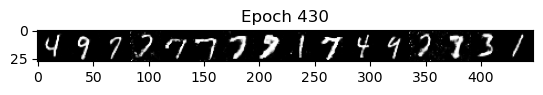

Epoch [431/500]  D_loss: 0.6922  G_loss: 2.3087
Epoch [432/500]  D_loss: 0.8296  G_loss: 1.7867
Epoch [433/500]  D_loss: 0.7779  G_loss: 1.7963
Epoch [434/500]  D_loss: 0.8818  G_loss: 1.9647
Epoch [435/500]  D_loss: 0.6320  G_loss: 1.7836
Epoch [436/500]  D_loss: 0.7246  G_loss: 2.8936
Epoch [437/500]  D_loss: 0.7552  G_loss: 2.4605
Epoch [438/500]  D_loss: 0.5667  G_loss: 2.4593
Epoch [439/500]  D_loss: 0.5777  G_loss: 2.2298
Epoch [440/500]  D_loss: 0.7109  G_loss: 2.1741


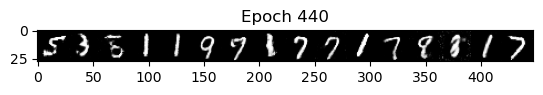

Epoch [441/500]  D_loss: 0.7999  G_loss: 2.2955
Epoch [442/500]  D_loss: 0.6269  G_loss: 2.0093
Epoch [443/500]  D_loss: 0.7304  G_loss: 2.1585
Epoch [444/500]  D_loss: 0.6325  G_loss: 2.3886
Epoch [445/500]  D_loss: 0.6810  G_loss: 2.2469
Epoch [446/500]  D_loss: 0.6369  G_loss: 1.8934
Epoch [447/500]  D_loss: 0.7164  G_loss: 1.8666
Epoch [448/500]  D_loss: 0.5419  G_loss: 1.7534
Epoch [449/500]  D_loss: 0.6334  G_loss: 2.4751
Epoch [450/500]  D_loss: 0.6504  G_loss: 2.3911


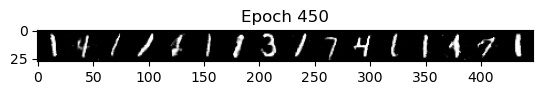

Epoch [451/500]  D_loss: 0.6690  G_loss: 1.9265
Epoch [452/500]  D_loss: 0.7060  G_loss: 2.0970
Epoch [453/500]  D_loss: 0.6848  G_loss: 2.6496
Epoch [454/500]  D_loss: 0.6166  G_loss: 2.6273
Epoch [455/500]  D_loss: 0.7212  G_loss: 2.3668
Epoch [456/500]  D_loss: 0.4280  G_loss: 3.0721
Epoch [457/500]  D_loss: 0.6766  G_loss: 2.2271
Epoch [458/500]  D_loss: 0.8422  G_loss: 2.4250
Epoch [459/500]  D_loss: 0.6767  G_loss: 2.4947
Epoch [460/500]  D_loss: 0.6002  G_loss: 2.7081


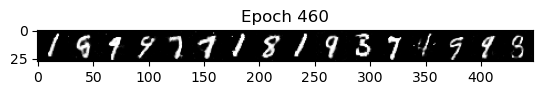

Epoch [461/500]  D_loss: 0.7883  G_loss: 2.3698
Epoch [462/500]  D_loss: 0.7895  G_loss: 2.0559
Epoch [463/500]  D_loss: 0.6400  G_loss: 2.6109
Epoch [464/500]  D_loss: 0.6536  G_loss: 2.4086
Epoch [465/500]  D_loss: 0.8192  G_loss: 1.9397
Epoch [466/500]  D_loss: 0.7044  G_loss: 2.5357
Epoch [467/500]  D_loss: 0.7739  G_loss: 1.8959
Epoch [468/500]  D_loss: 0.5940  G_loss: 1.8615
Epoch [469/500]  D_loss: 0.8008  G_loss: 2.3021
Epoch [470/500]  D_loss: 0.6627  G_loss: 2.6425


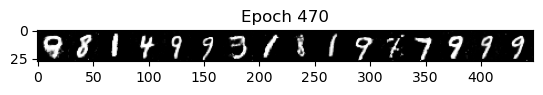

Epoch [471/500]  D_loss: 0.5981  G_loss: 2.7542
Epoch [472/500]  D_loss: 0.7157  G_loss: 2.3122
Epoch [473/500]  D_loss: 0.6157  G_loss: 2.5783
Epoch [474/500]  D_loss: 0.7494  G_loss: 2.3716
Epoch [475/500]  D_loss: 0.6046  G_loss: 1.9508
Epoch [476/500]  D_loss: 0.6222  G_loss: 2.1601
Epoch [477/500]  D_loss: 0.6947  G_loss: 2.7870
Epoch [478/500]  D_loss: 0.6935  G_loss: 2.2605
Epoch [479/500]  D_loss: 0.6576  G_loss: 1.9887
Epoch [480/500]  D_loss: 0.8088  G_loss: 2.1384


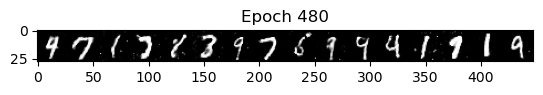

Epoch [481/500]  D_loss: 0.5523  G_loss: 3.0578
Epoch [482/500]  D_loss: 0.7487  G_loss: 2.7518
Epoch [483/500]  D_loss: 0.5777  G_loss: 2.5191
Epoch [484/500]  D_loss: 0.9012  G_loss: 2.5579
Epoch [485/500]  D_loss: 0.8588  G_loss: 2.4228
Epoch [486/500]  D_loss: 0.8309  G_loss: 2.2058
Epoch [487/500]  D_loss: 0.6399  G_loss: 2.3532
Epoch [488/500]  D_loss: 0.6970  G_loss: 2.0842
Epoch [489/500]  D_loss: 0.6845  G_loss: 2.5977
Epoch [490/500]  D_loss: 0.5235  G_loss: 2.3519


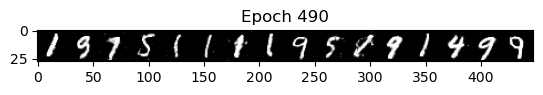

Epoch [491/500]  D_loss: 0.5402  G_loss: 2.1268
Epoch [492/500]  D_loss: 0.4938  G_loss: 2.8607
Epoch [493/500]  D_loss: 0.5596  G_loss: 1.7733
Epoch [494/500]  D_loss: 0.5409  G_loss: 2.3107
Epoch [495/500]  D_loss: 0.6350  G_loss: 3.4733
Epoch [496/500]  D_loss: 0.6507  G_loss: 2.1676
Epoch [497/500]  D_loss: 0.5535  G_loss: 2.3649
Epoch [498/500]  D_loss: 0.6489  G_loss: 2.2247
Epoch [499/500]  D_loss: 0.6113  G_loss: 2.6092
Epoch [500/500]  D_loss: 0.5972  G_loss: 2.0625


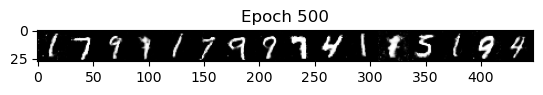

In [ ]:
#Training loop
for epoch in range(epochs):
    for i, (real_imgs,_) in enumerate(dataloader):
        real_imgs = real_imgs.view(-1, image_size).to(device)
        batch_size = real_imgs.size(0)

        # Real and fake labels
        real = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)

        # Train Discriminator
        z = torch.randn(batch_size, latent_dim, device= device)
        fake_imgs = generator(z)

        real_loss = criterion(discriminator(real_imgs), real)
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake)
        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()


        # Train Generator
        z = torch.randn(batch_size, latent_dim, device=device)
        fake_imgs = generator(z)
        g_loss = criterion(discriminator(fake_imgs), real)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}]  D_loss: {d_loss.item():.4f}  G_loss: {g_loss.item():.4f}")
    
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            sample_z = torch.randn(16, latent_dim, device=device)
            generated = generator(sample_z).view(-1, 1, 28, 28)
            grid = torch.cat([img for img in generated], dim=2).squeeze().cpu()
            plt.imshow(grid, cmap="gray")
            plt.title(f"Epoch {epoch+1}")
            plt.savefig(f"gen_images_mnist/Epoch{epoch + 1}.png")
            plt.show()